# Muhammad Tahir Zia
# 2021465

## Importing Spark Session

In [2]:
# Import SparkSession
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("NetflixEDA").getOrCreate()

# Path to the CSV file
file_path = "netflix_titles.csv"

# Load the CSV file
df = spark.read.csv(file_path, header=True, inferSchema=True)

## First 5 Rows

In [27]:
df.show(5)


+-------+-------+--------------------+---------------+--------------------+-------------+------------------+------------+------+---------+--------------------+--------------------+
|show_id|   type|               title|       director|                cast|      country|        date_added|release_year|rating| duration|           listed_in|         description|
+-------+-------+--------------------+---------------+--------------------+-------------+------------------+------------+------+---------+--------------------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|Kirsten Johnson|                NULL|United States|September 25, 2021|        2020| PG-13|   90 min|       Documentaries|As her father nea...|
|     s2|TV Show|       Blood & Water|           NULL|Ama Qamata, Khosi...| South Africa|September 24, 2021|        2021| TV-MA|2 Seasons|International TV ...|After crossing pa...|
|     s3|TV Show|           Ganglands|Julien Leclercq|Sami Bouajila, Tr...|         NULL|Septem

## Schema

In [4]:
df.printSchema()


root
 |-- show_id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- description: string (nullable = true)



## Describing First 5 Rows

In [5]:
df.describe().show(5)


+-------+--------------------+-------------+---------------------------------+--------------------+--------------------+----------------+---------------+-----------------+-----------------+-------------+--------------------+--------------------+
|summary|             show_id|         type|                            title|            director|                cast|         country|     date_added|     release_year|           rating|     duration|           listed_in|         description|
+-------+--------------------+-------------+---------------------------------+--------------------+--------------------+----------------+---------------+-----------------+-----------------+-------------+--------------------+--------------------+
|  count|                8809|         8808|                             8807|                6173|                7983|            7977|           8796|             8807|             8803|         8804|                8806|                8806|
|   mean|       

## Visualization of The Dataset

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution of Ratings (Histogram)

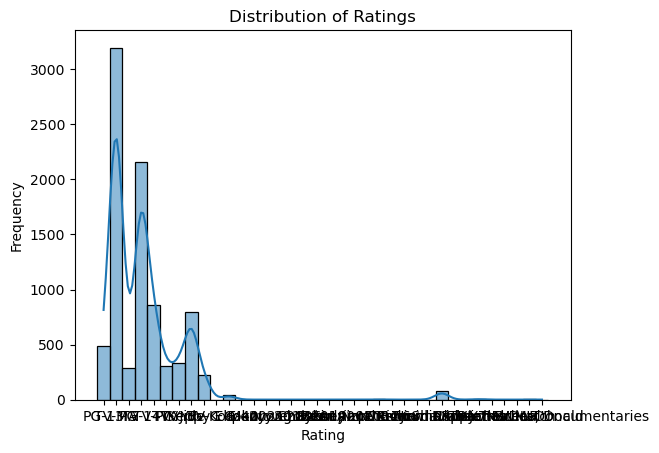

In [7]:
rating_data = df.select("rating").toPandas()

# Plot the distribution of ratings
sns.histplot(rating_data['rating'], kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

## Comparison count of Movies and TV shows (Pie Chart)

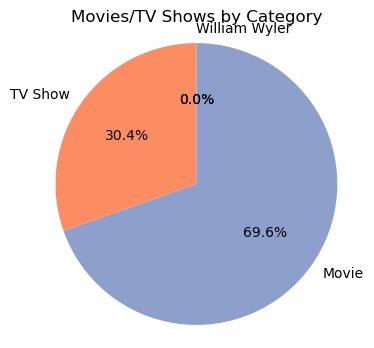

In [25]:
# Count the number of movies/TV shows in each category
category_count = df.groupBy("type").count().toPandas()

# Plot the counts as a pie chart
plt.figure(figsize=(4, 4))
plt.pie(category_count['count'], labels=category_count['type'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(category_count)))
plt.title("Movies/TV Shows by Category")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


## Distribution of Release Years (Histogram)

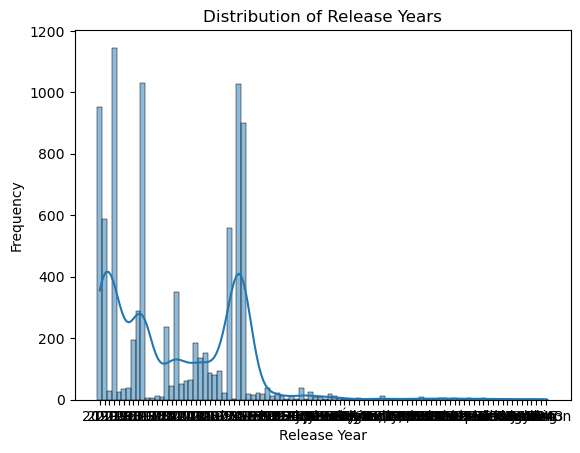

In [10]:
# Assuming the dataset has a "release_year" column
release_year_data = df.select("release_year").toPandas()

# Plot the distribution of release years
sns.histplot(release_year_data['release_year'], kde=True)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()